In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# calculate the overlap area of two circles with a percentage offset
def calculate_overlap_area(radius_1: float, radius_2: float, offset: float):
    """Calculates the overlap area of two circles with a percentage offset

    Parameters
    ----------
    radius_1 : float
        radius of the first circle
    radius_2 : float
        radius of the second circle
    offset : float
        percentage offset between the two circles

    Returns
    -------
    float
        overlap area of the two circles
    """
    # calculate the distance between the centres of the two circles
    distance = radius_1 + radius_2 - radius_1 * offset

    # calculate the overlap area
    overlap_area = np.pi * (radius_1 ** 2 + radius_2 ** 2 - distance ** 2)

    return overlap_area

radius_1 = 1
radius_2 = 1
offset = 0.1

overlap_area = calculate_overlap_area(radius_1, radius_2, offset)
print(overlap_area)


-5.057964172279567


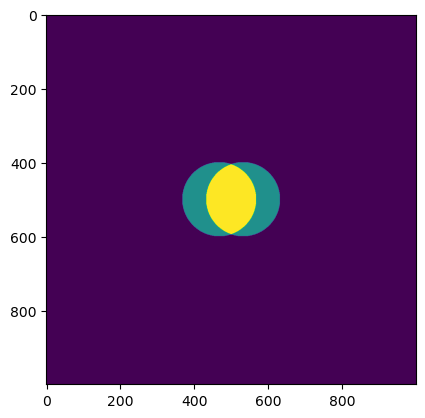

In [30]:
# define a 100 x 100 array
profile = np.zeros((1000, 1000))
profile2 = profile.copy()
# place a circle of radius 10 in the centre of the array using skimage
from skimage.draw import disk
# get centre point of profile
radius = 100
offset = 1-0.68
centre = (profile.shape[0]//2, profile.shape[1]//2 + offset*radius)

# create disk at offset of 0.5 * radius from centre
rr, cc = disk(centre, radius)
profile[rr, cc] = 1

centre2 = (profile.shape[0]//2, profile.shape[1]//2 - offset*radius)
rr, cc = disk(centre2, radius)
profile2[rr, cc] = 1

# plt.imshow(profile)
# plt.show()
# plt.imshow(profile2)
# plt.show()

# total = np.logical_and(profile, profile2)
total = profile + profile2
plt.imshow(total)
plt.show()


In [31]:
print(np.sum(total))

62794.0
3141592.653589793


In [20]:
profile_1um = np.ones(shape=(40, 40)) * 5.e-6
profile_100nm = np.ones(shape=(201, 201)) * 5.e-6

In [21]:
# plt.imshow(profile_1um)
# plt.colorbar()
# plt.show()
# plt.imshow(profile_100nm)
# plt.colorbar()

In [22]:
# calculate the volume of the 1um profile
volume_1um = np.sum(profile_1um*1e-6**2)
print(volume_1um)


8e-15


In [23]:
# do the same for the 100nm profile
volume_100nm = np.sum(profile_100nm*0.1e-6**2)
print(volume_100nm)


2.0200500000000006e-15


In [24]:
def calculate_volume_um(profile, pixel_size):
    return np.sum(profile*pixel_size**2) * 1e18
    

In [25]:
print(calculate_volume_um(profile_1um, 0.5e-6))
print(calculate_volume_um(profile_100nm, 0.1e-6))

2000.0000000000002
2020.0500000000006
